### Sanjay Giri Goswami

# Task - Stock Market Prediction Using Numerical And Textual Analysis

In [1]:
# Imports
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import seaborn as sns
from pandas import plotting
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')
df2=pd.read_csv("/content/drive/MyDrive/^NSEI (3).csv")

In [4]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [5]:
df1.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [7]:
# df1=df1[['publish_date','headline_text']].drop_duplicates()



In [8]:
df1['Date'] = pd.to_datetime(df1['publish_date'], format='%Y%m%d')

In [9]:
df1.tail()

,publish_date,headline_category,headline_text,Date
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...,2020-06-30


In [10]:
df1.drop(columns='publish_date',inplace=True)

In [11]:
df1.head()

,headline_category,headline_text,Date
0,sports.wwe,win over cena satisfying but defeating underta...,2001-01-01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
2,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
3,unknown,America's unwanted heading for India?,2001-01-02
4,unknown,For bigwigs; it is destination Goa,2001-01-02


In [12]:
# cheak null values 
df1.isna().sum()

headline_category    0
headline_text        0
Date                 0
dtype: int64

In [13]:
!pip install neattext

     |████████████████████████████████| 92kB 5.5MB/s 


### Text preprocessing or text cleaning

In [14]:
# Load Text cleaning pkgs
import neattext as nt
import neattext.functions as nfx

In [15]:
# Noise scan
df1['headline_text'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0           2.898551
1           8.620690
2           5.714286
3           8.108108
4          11.764706
             ...    
3297167     4.444444
3297168     1.041667
3297169     6.140351
3297170     4.587156
3297171     6.250000
Name: headline_text, Length: 3297172, dtype: float64

In [16]:
# text cleaning for df1['headline_text']
#remove sapcial characters
df1['headline_text']=df1['headline_text'].apply(nfx.remove_special_characters)
# remove multiple
df1['headline_text']=df1['headline_text'].apply(nfx.remove_multiple_spaces)
## contractions
df1['headline_text']=df1['headline_text'].apply(nfx.fix_contractions)
# remove stopwords
df1['headline_text']=df1['headline_text'].apply(nfx.remove_stopwords)
# remove punctation
df1['headline_text']=df1['headline_text'].apply(nfx.remove_punctuations)


In [17]:
df1.head()

,headline_category,headline_text,Date
0,sports.wwe,win cena satisfying defeating undertaker bigge...,2001-01-01
1,unknown,status quo disturbed ayodhya says vajpayee,2001-01-02
2,unknown,fissures hurriyat pak visit,2001-01-02
3,unknown,americas unwanted heading india,2001-01-02
4,unknown,bigwigs destination goa,2001-01-02


In [18]:
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
headline=' '.join(df1['headline_text'].str.lower())

In [20]:
stopwords = set(STOPWORDS)
stopwords.add('will')
worldcloud=WordCloud(stopwords=stopwords,background_color='white',max_words=500).generate(headline)

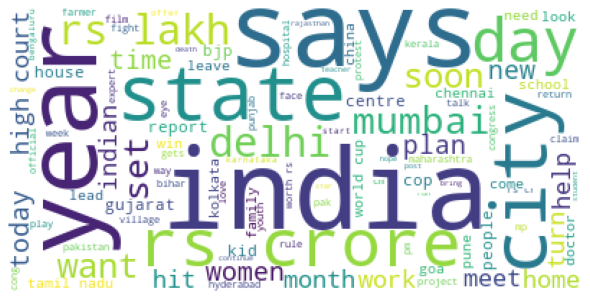

In [21]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(worldcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [22]:
# stock data
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-18,10873.400391,10887.500000,10782.400391,10817.000000,10817.000000,312000.0
1,2018-01-19,10829.200195,10906.849609,10793.900391,10894.700195,10894.700195,207600.0
2,2018-01-22,10883.200195,10975.099609,10881.400391,10966.200195,10966.200195,231600.0
3,2018-01-23,10997.400391,11092.900391,10994.549805,11083.700195,11083.700195,284600.0
4,2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       696 non-null    object 
 1   Open       694 non-null    float64
 2   High       694 non-null    float64
 3   Low        694 non-null    float64
 4   Close      694 non-null    float64
 5   Adj Close  694 non-null    float64
 6   Volume     694 non-null    float64
dtypes: float64(6), object(1)
memory usage: 38.2+ KB


In [24]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

In [25]:
# Convert the date column from int64 to datetime
#df2['Date'] = pd.to_datetime(df2.Date).dt.date
#print(df2.head())

In [26]:
df2.describe

<bound method NDFrame.describe of           Date          Open  ...     Adj Close    Volume
0   2018-01-18  10873.400391  ...  10817.000000  312000.0
1   2018-01-19  10829.200195  ...  10894.700195  207600.0
2   2018-01-22  10883.200195  ...  10966.200195  231600.0
3   2018-01-23  10997.400391  ...  11083.700195  284600.0
4   2018-01-24  11069.349609  ...  11086.000000  283400.0
..         ...           ...  ...           ...       ...
691 2020-11-10  12556.400391  ...  12631.099609  847500.0
692 2020-11-11  12680.599609  ...  12749.150391  880500.0
693 2020-11-12  12702.150391  ...  12690.799805  622000.0
694 2020-11-13  12659.700195  ...  12719.950195  513900.0
695 2020-11-17  12932.500000  ...  12874.200195  707700.0

[696 rows x 7 columns]>

In [27]:
df2.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [28]:
df2.dropna(inplace=True)

In [29]:
df2.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 695
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       694 non-null    datetime64[ns]
 1   Open       694 non-null    float64       
 2   High       694 non-null    float64       
 3   Low        694 non-null    float64       
 4   Close      694 non-null    float64       
 5   Adj Close  694 non-null    float64       
 6   Volume     694 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 43.4 KB


### Visualizing the Stock Data

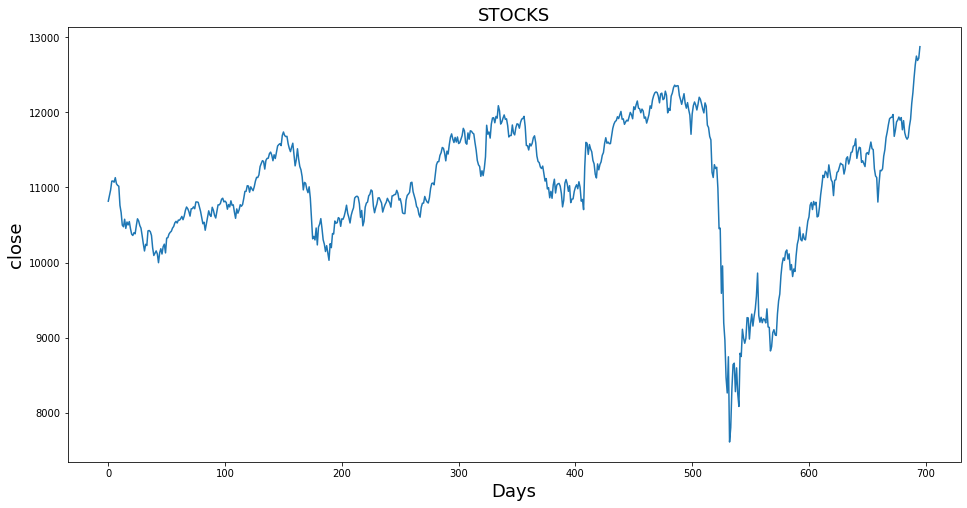

In [31]:
plt.figure(figsize=(16,8))
plt.title('STOCKS',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('close',fontsize=18)
plt.plot(df2['Close'])
plt.show()

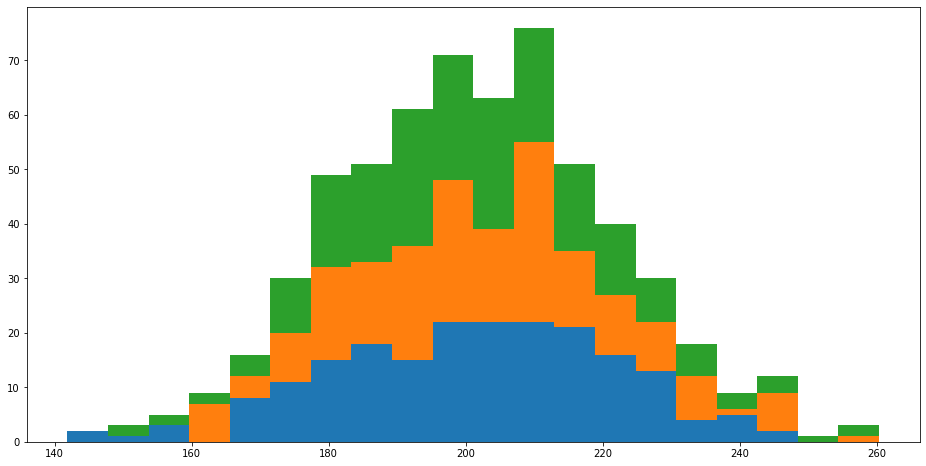

In [32]:
# stacked graph
plt.figure(figsize=(16,8))
a,b=200,20
x= a +b *np.random.randn(200,3)
n , bins, patches=plt.hist(x, 20, stacked=True)
plt.show()

In [33]:
# split the data train and validation
train=df2[:180]
valid=df2[180:]

In [34]:
training=train['Close']
validation=valid['Close']

In [35]:
training.head()

0    10817.000000
1    10894.700195
2    10966.200195
3    11083.700195
4    11086.000000
Name: Close, dtype: float64

## Using Vader for **Sentiment**

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [37]:
# Merge the data
merge_data=df1.merge(df2,how='inner',on='Date',left_index=True)
merge_data.head()

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume
0,entertainment.kannada.movies.news,yuga chandru turns actor kanaka,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
0,entertainment.kannada.movies.news,charan raj creates anthem fear tagaru,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
0,city.bengaluru,summer 2017,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
0,entertainment.kannada.music,touch indian classical modern tunes,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
0,city.bengaluru,bizarre beauty trends ready 2018,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0


In [38]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343580 entries, 0 to 597
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   headline_category  343580 non-null  object        
 1   headline_text      343580 non-null  object        
 2   Date               343580 non-null  datetime64[ns]
 3   Open               343580 non-null  float64       
 4   High               343580 non-null  float64       
 5   Low                343580 non-null  float64       
 6   Close              343580 non-null  float64       
 7   Adj Close          343580 non-null  float64       
 8   Volume             343580 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 26.2+ MB


In [39]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 8.6MB/s 


In [40]:
# NLTK VADER for sentiment analysis
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re



In [41]:
merge_data.fillna(0, inplace=True)  

 #Resting index after merge
merge_data.reset_index(inplace = True,drop=True) #Resting index after merge
merge_data.head()

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume
0,entertainment.kannada.movies.news,yuga chandru turns actor kanaka,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
1,entertainment.kannada.movies.news,charan raj creates anthem fear tagaru,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
2,city.bengaluru,summer 2017,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
3,entertainment.kannada.music,touch indian classical modern tunes,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0
4,city.bengaluru,bizarre beauty trends ready 2018,2018-01-18,10873.400391,10887.5,10782.400391,10817.0,10817.0,312000.0


In [42]:
merge_data.shape

(343580, 9)

In [43]:
# Use these column names
vader = SentimentIntensityAnalyzer()
columns = ['Date', 'headline_text', 'Open', 'High','Low','Close','Volume']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(merge_data, columns=columns)

# Iterate through the headlines and get the polarity scores
scores = scored_news['headline_text'].apply(vader.polarity_scores)

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame.from_records(scores)

# Join the DataFrames
scored_news = scored_news.join(scores_df)


In [44]:
scores.head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.344, 'neu': 0.43, 'pos': 0.226, 'com...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.217, 'neu': 0.189, 'pos': 0.594, 'co...
Name: headline_text, dtype: object

In [45]:
df=merge_data[columns]

In [46]:
df

,Date,headline_text,Open,High,Low,Close,Volume
0,2018-01-18,yuga chandru turns actor kanaka,10873.400391,10887.500000,10782.400391,10817.000000,312000.0
1,2018-01-18,charan raj creates anthem fear tagaru,10873.400391,10887.500000,10782.400391,10817.000000,312000.0
2,2018-01-18,summer 2017,10873.400391,10887.500000,10782.400391,10817.000000,312000.0
3,2018-01-18,touch indian classical modern tunes,10873.400391,10887.500000,10782.400391,10817.000000,312000.0
4,2018-01-18,bizarre beauty trends ready 2018,10873.400391,10887.500000,10782.400391,10817.000000,312000.0
...,...,...,...,...,...,...,...
343575,2020-06-30,tiktok removed 1 65 crore videos india,10382.599609,10401.049805,10267.349609,10302.099609,556200.0
343576,2020-06-30,apurva asrani calls alia bhatts mother soni ra...,10382.599609,10401.049805,10267.349609,10302.099609,556200.0
343577,2020-06-30,kangana ranaut gets doll version team shares m...,10382.599609,10401.049805,10267.349609,10302.099609,556200.0
343578,2020-06-30,meezaan jaffrey reminisces childhood days gran...,10382.599609,10401.049805,10267.349609,10302.099609,556200.0


## Calculating Sentiment **Scores**

In [47]:
# adding empty sentiment columns to df for later calculation
df['compound'] = ''
df['negative'] = ''
df['neutral'] = ''
df['positive'] = ''
df.head()

,Date,headline_text,Open,High,Low,Close,Volume,compound,negative,neutral,positive
0,2018-01-18,yuga chandru turns actor kanaka,10873.400391,10887.5,10782.400391,10817.0,312000.0,,,,
1,2018-01-18,charan raj creates anthem fear tagaru,10873.400391,10887.5,10782.400391,10817.0,312000.0,,,,
2,2018-01-18,summer 2017,10873.400391,10887.5,10782.400391,10817.0,312000.0,,,,
3,2018-01-18,touch indian classical modern tunes,10873.400391,10887.5,10782.400391,10817.0,312000.0,,,,
4,2018-01-18,bizarre beauty trends ready 2018,10873.400391,10887.5,10782.400391,10817.0,312000.0,,,,


In [48]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
#vader = SentimentIntensityAnalyzer()

# calculating sentiment scores
df['compound'] = df['headline_text'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['negative'] = df['headline_text'].apply(lambda x: vader.polarity_scores(x)['neg'])
df['neutral'] = df['headline_text'].apply(lambda x: vader.polarity_scores(x)['neu'])
df['positive'] = df['headline_text'].apply(lambda x: vader.polarity_scores(x)['pos'])

# displaying the stock data
df.head()

,Date,headline_text,Open,High,Low,Close,Volume,compound,negative,neutral,positive
0,2018-01-18,yuga chandru turns actor kanaka,10873.400391,10887.5,10782.400391,10817.0,312000.0,0.0000,0.000,1.000,0.000
1,2018-01-18,charan raj creates anthem fear tagaru,10873.400391,10887.5,10782.400391,10817.0,312000.0,-0.2732,0.344,0.430,0.226
2,2018-01-18,summer 2017,10873.400391,10887.5,10782.400391,10817.0,312000.0,0.0000,0.000,1.000,0.000
3,2018-01-18,touch indian classical modern tunes,10873.400391,10887.5,10782.400391,10817.0,312000.0,0.0000,0.000,1.000,0.000
4,2018-01-18,bizarre beauty trends ready 2018,10873.400391,10887.5,10782.400391,10817.0,312000.0,0.6124,0.217,0.189,0.594


In [49]:
# dropping the 'headline_text' which is unwanted now
df.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
df = df[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
df.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
0,10817.0,0.0000,0.000,1.000,0.000,10873.400391,10887.5,10782.400391,312000.0
1,10817.0,-0.2732,0.344,0.430,0.226,10873.400391,10887.5,10782.400391,312000.0
2,10817.0,0.0000,0.000,1.000,0.000,10873.400391,10887.5,10782.400391,312000.0
3,10817.0,0.0000,0.000,1.000,0.000,10873.400391,10887.5,10782.400391,312000.0
4,10817.0,0.6124,0.217,0.189,0.594,10873.400391,10887.5,10782.400391,312000.0


In [50]:
# displaying stock_data statistics
df.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,343580.000000,343580.000000,343580.000000,343580.000000,343580.000000,343580.000000,343580.000000,343580.000000,3.435800e+05
mean,10926.916690,-0.068013,0.138949,0.775991,0.085011,10938.553428,10995.103213,10859.960419,4.150945e+05
std,804.481194,0.355765,0.207643,0.233223,0.158453,807.606351,781.513456,828.122037,2.441956e+05
min,7610.250000,-0.960700,0.000000,0.000000,0.000000,7735.149902,8036.950195,7511.100098,0.000000e+00
25%,10539.750000,-0.318200,0.000000,0.597000,0.000000,10558.750000,10604.900391,10489.750000,2.417000e+05
50%,10886.799805,0.000000,0.000000,0.780000,0.000000,10895.799805,10941.200195,10823.799805,3.428000e+05
75%,11552.500000,0.000000,0.292000,1.000000,0.141000,11561.450195,11599.000000,11484.450195,5.500000e+05
max,12362.299805,0.956900,1.000000,1.000000,1.000000,12430.500000,12430.500000,12321.400391,1.811000e+06


In [51]:
# displaying df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343580 entries, 0 to 343579
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Close     343580 non-null  float64
 1   compound  343580 non-null  float64
 2   negative  343580 non-null  float64
 3   neutral   343580 non-null  float64
 4   positive  343580 non-null  float64
 5   Open      343580 non-null  float64
 6   High      343580 non-null  float64
 7   Low       343580 non-null  float64
 8   Volume    343580 non-null  float64
dtypes: float64(9)
memory usage: 23.6 MB


Text(0, 0.5, 'Close Price ($)')

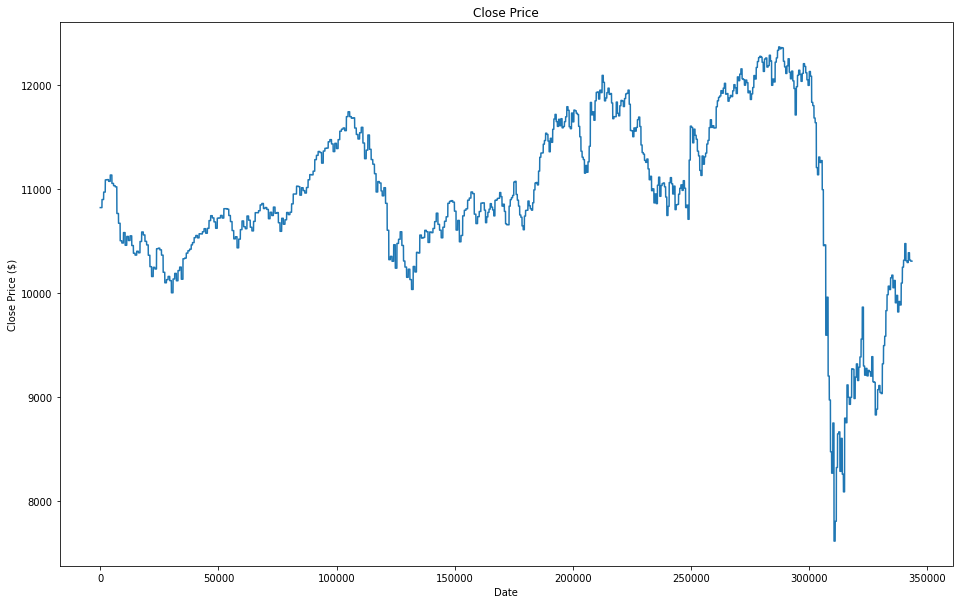

In [52]:
# EDA on DF
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
df['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

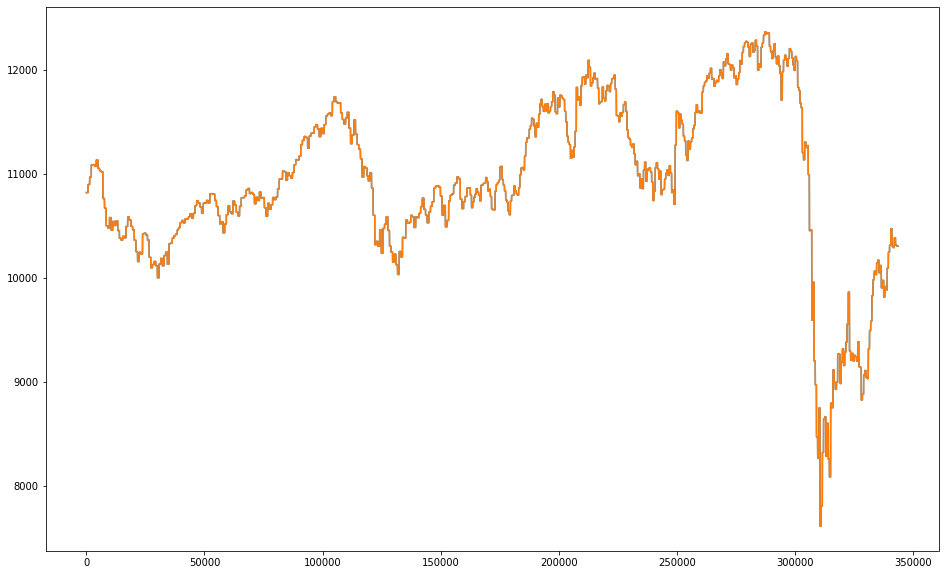

In [53]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
df['Close'].plot()
df.rolling(window=30).mean()['Close'].plot()

## Data Preparation for Modelling

In [54]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(df)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(df)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 274863
Number of records in Test Data: 68717


In [55]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = df.iloc[start:total_data,0] #close
compound = df.iloc[start:total_data,1] #compound
negative = df.iloc[start:total_data,2] #neg
neutral = df.iloc[start:total_data,3] #neu
positive = df.iloc[start:total_data,4] #pos
open_price = df.iloc[start:total_data,5] #open
high = df.iloc[start:total_data,6] #high
low = df.iloc[start:total_data,7] #low
volume = df.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


1         10817.000000
2         10817.000000
3         10817.000000
4         10817.000000
5         10817.000000
              ...     
343575    10302.099609
343576    10302.099609
343577    10302.099609
343578    10302.099609
343579    10302.099609
Name: Close, Length: 343579, dtype: float64

In [56]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
1,10817.0,10817.0,-0.2732,0.0000,312000.0,10873.400391,10887.5,10782.400391
2,10817.0,10817.0,0.0000,0.0000,312000.0,10873.400391,10887.5,10782.400391
3,10817.0,10817.0,0.0000,0.6124,312000.0,10873.400391,10887.5,10782.400391
4,10817.0,10817.0,0.6124,0.4404,312000.0,10873.400391,10887.5,10782.400391
5,10817.0,10817.0,0.4404,0.5719,312000.0,10873.400391,10887.5,10782.400391
6,10817.0,10817.0,0.5719,0.5719,312000.0,10873.400391,10887.5,10782.400391
7,10817.0,10817.0,0.5719,0.4767,312000.0,10873.400391,10887.5,10782.400391
8,10817.0,10817.0,0.4767,0.4767,312000.0,10873.400391,10887.5,10782.400391
9,10817.0,10817.0,0.4767,0.0000,312000.0,10873.400391,10887.5,10782.400391
10,10817.0,10817.0,0.0000,0.5859,312000.0,10873.400391,10887.5,10782.400391


## Setting the Target Variable and the Feature Dataset

In [57]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

1         10817.000000
2         10817.000000
3         10817.000000
4         10817.000000
5         10817.000000
              ...     
343574    10302.099609
343575    10302.099609
343576    10302.099609
343577    10302.099609
343578    10302.099609
Name: close_price_shifted, Length: 343578, dtype: float64

In [58]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
1,10817.000000,-0.2732,0.0000,312000.0,10873.400391,10887.500000,10782.400391
2,10817.000000,0.0000,0.0000,312000.0,10873.400391,10887.500000,10782.400391
3,10817.000000,0.0000,0.6124,312000.0,10873.400391,10887.500000,10782.400391
4,10817.000000,0.6124,0.4404,312000.0,10873.400391,10887.500000,10782.400391
5,10817.000000,0.4404,0.5719,312000.0,10873.400391,10887.500000,10782.400391
...,...,...,...,...,...,...,...
343574,10302.099609,-0.1027,0.0000,556200.0,10382.599609,10401.049805,10267.349609
343575,10302.099609,0.0000,0.0000,556200.0,10382.599609,10401.049805,10267.349609
343576,10302.099609,0.0000,0.2960,556200.0,10382.599609,10401.049805,10267.349609
343577,10302.099609,0.2960,0.4939,556200.0,10382.599609,10401.049805,10267.349609


In [59]:
#  Scaling the Target Variable and the Feature Dataset
# scaling the feature dataset
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 0.34962811, -0.28295786,  0.00198164, ...,  0.33674824,
          0.29760669,  0.36012311],
        [ 0.34962811,  0.00198164,  0.00198164, ...,  0.33674824,
          0.29760669,  0.36012311],
        [ 0.34962811,  0.00198164,  0.6406967 , ...,  0.33674824,
          0.29760669,  0.36012311],
        ...,
        [ 0.13292146,  0.00198164,  0.31070088, ...,  0.12769001,
          0.07616834,  0.14597815],
        [ 0.13292146,  0.31070088,  0.51710471, ...,  0.12769001,
          0.07616834,  0.14597815],
        [ 0.13292146,  0.51710471,  0.31070088, ...,  0.12769001,
          0.07616834,  0.14597815]]), array([[0.34962811],
        [0.34962811],
        [0.34962811],
        ...,
        [0.13292146],
        [0.13292146],
        [0.13292146]]))

In [60]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (274863, 7) and y: (274863, 1)
Number of rows and columns in the Test set X: (68714, 7) and y: (68714, 1)


In [61]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (274863, 7, 1)
Shape of Test set X: (68714, 7, 1)


## Stock Data **Modelling**

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation


In [63]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [64]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
27487/27487 [==============================] - 182s 7ms/step - loss: 6.4447e-04 - val_loss: 4.1446e-04
Epoch 2/10
27487/27487 [==============================] - 179s 7ms/step - loss: 1.8708e-04 - val_loss: 0.0018
Epoch 3/10
27487/27487 [==============================] - 180s 7ms/step - loss: 1.2129e-04 - val_loss: 1.1595e-04
Epoch 4/10
27487/27487 [==============================] - 181s 7ms/step - loss: 9.8476e-05 - val_loss: 1.1434e-04
Epoch 5/10
27487/27487 [==============================] - 181s 7ms/step - loss: 8.9244e-05 - val_loss: 2.7838e-05
Epoch 6/10
27487/27487 [==============================] - 178s 6ms/step - loss: 8.3166e-05 - val_loss: 3.1204e-05
Epoch 7/10
27487/27487 [==============================] - 181s 7ms/step - loss: 7.8778e-05 - val_loss: 1.1946e-04
Epoch 8/10
27487/27487 [==============================] - 181s 7ms/step - loss: 7.6577e-05 - val_loss: 3.3273e-04
Epoch 9/10
27487/27487 [==============================] - 181s 7ms/step - loss: 7.3401e-05 -

In [65]:
# Predictions
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[11918.283],
       [11915.593],
       [11917.797],
       [11918.968],
       [11918.207]], dtype=float32)

In [66]:
#  Model Evaluation
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

68714/68714 [==============================] - 186s 3ms/step - loss: 0.0449
Train Loss = 0.0
Test Loss = 0.0449


In [67]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 10856.3681


In [68]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 10856.3681


In [69]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

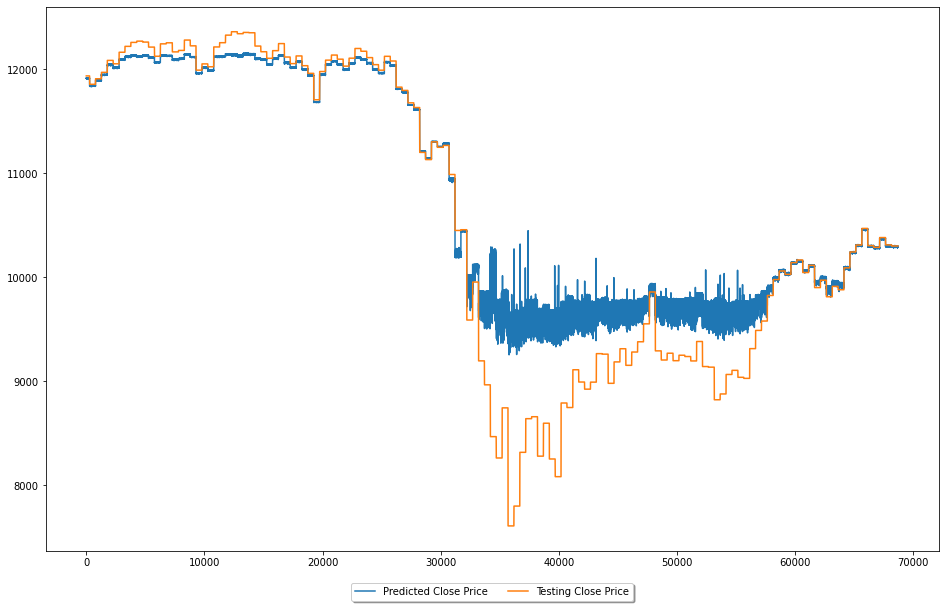

In [70]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()